In [5]:
import pandas as pd
import json
with open('/home/sejune/ParlAI/projects/roscoe/roscoe_data/generated/sampled_cot.json', 'r') as f:
    data = json.load(f)

result = {str(idx):_data for idx, _data in enumerate(data)}

In [7]:
with open('/home/sejune/ParlAI/projects/roscoe/roscoe_data/generated/sampled_cot.json', 'w') as f:
    json.dump(result, f, indent=4)

In [6]:
rationale = pd.read_csv("roscoe-512-roberta-base/scores_sampled_rationale.tsv", sep="\s+")
seed = pd.read_csv("roscoe-512-roberta-base/scores_sampled_seed.tsv",sep="\s+")
cot = pd.read_csv("roscoe-512-roberta-base/scores_sampled_cot.tsv",sep="\s+")

In [3]:
rationale.to_csv("roscoe-512-roberta-base/scores_sampled_rationale.csv", index=False)
seed.to_csv("roscoe-512-roberta-base/scores_sampled_seed.csv", index=False)
cot.to_csv("roscoe-512-roberta-base/scores_sampled_cot.csv", index=False)

In [16]:
mean_df

,augmented,cot
ID,531.000000,6541.500000
faithfulness,0.891391,0.887701
informativeness_step,0.879284,0.867529
informativeness_chain,0.941931,0.945117
faithfulness_ww,0.952127,0.949391
repetition_word,0.279712,0.562798
repetition_step,0.291013,0.573211
discourse_representation,0.468723,0.686887
coherence_step_vs_step,0.781334,0.878215
perplexity_step,0.012176,0.014652


In [15]:
# calculate the mean of each column in both dataframes
df1_mean = rationale.mean()
df2_mean = cot.mean()

# create a new dataframe with the mean of the columns in both dataframes
mean_df = pd.concat([df1_mean, df2_mean], axis=1)
mean_df.columns = ['augmented', 'cot']

In [18]:
import pandas as pd
import seaborn as sns

sns.barplot(x=mean_df.index, y="value", hue="variable", data=pd.melt(mean_df))

ValueError: Grouper and axis must be same length

In [ ]:
import matplotlib.pyplot as plt

col_name = [
'faithfulness',
'informativeness_step',
'informativeness_chain',
'faithfulness_ww',
'repetition_word',
'repetition_step',
'discourse_representation',
'coherence_step_vs_step',
'perplexity_step',
'perplexity_chain',
'perplexity_step_max',
'grammar_step',
'grammar_step_max']

for key in col_name:
    plt.hist(rationale[key], bins=50, density=True, alpha=0.5, label="Rationale")
    plt.hist(cot[key], bins=50, density=True, alpha=0.5, label="CoT" ,color="red")
    plt.title(key)
    plt.xlabel("score")
    plt.ylabel("density")
    plt.legend(loc='upper right')
    plt.savefig(f"roscoe-512-roberta-base/output/rat_cot_{key}.svg",format='svg', dpi='figure', bbox_inches='tight')
    # plt.show()

KeyboardInterrupt: 

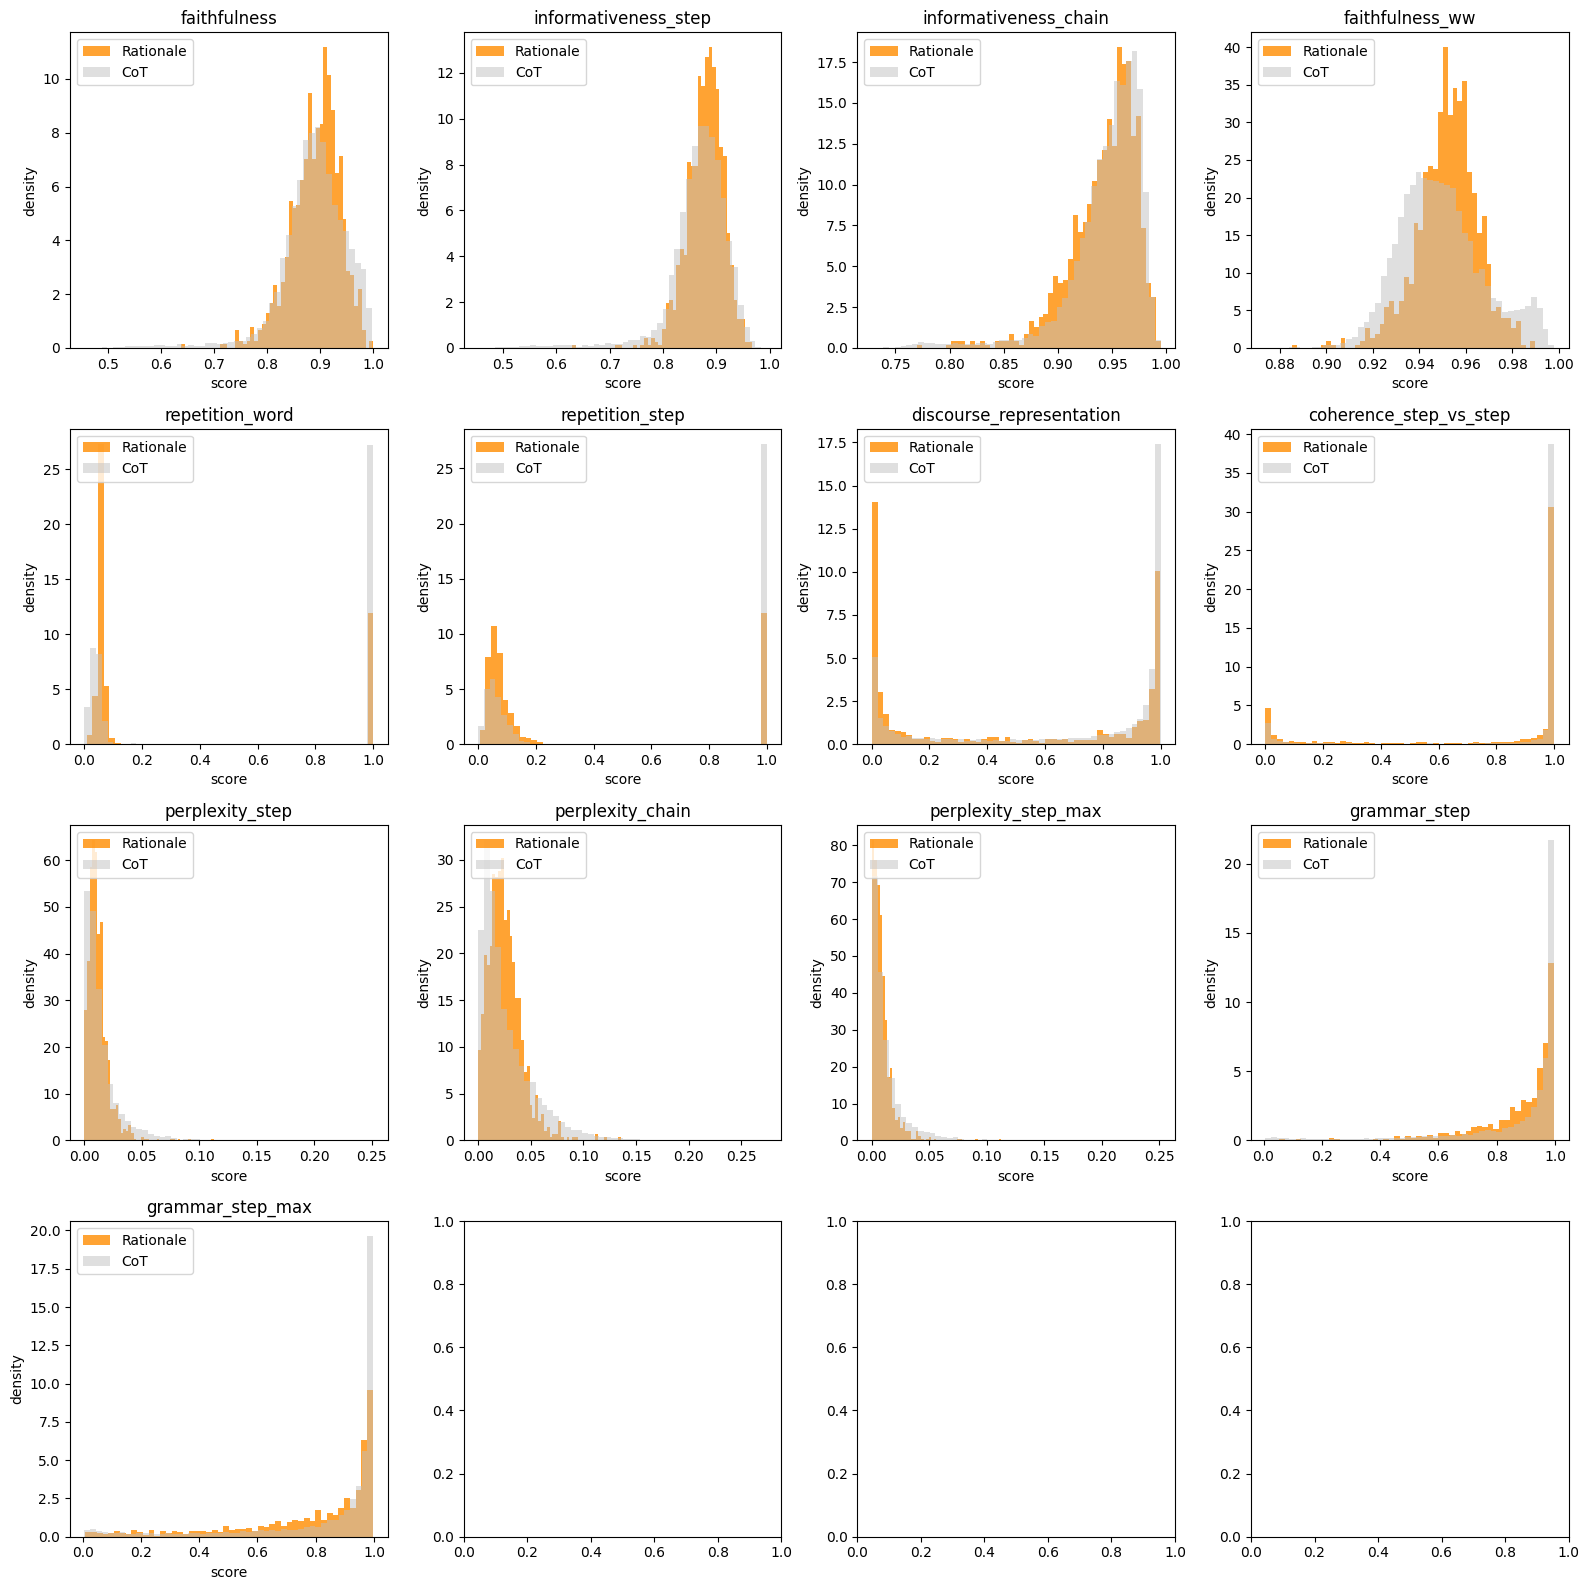

In [17]:
import matplotlib.pyplot as plt

col_name = ['faithfulness', 'informativeness_step', 'informativeness_chain', 'faithfulness_ww', 'repetition_word', 'repetition_step', 'discourse_representation', 'coherence_step_vs_step', 'perplexity_step', 'perplexity_chain', 'perplexity_step_max', 'grammar_step', 'grammar_step_max']

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i, key in enumerate(col_name):
    row = i // 4
    col = i % 4
    axs[row, col].hist(rationale[key], bins=50, density=True, alpha=0.8, label="Rationale",color="darkorange")
    axs[row, col].hist(cot[key], bins=50, density=True, alpha=0.5, label="CoT" ,color="silver")
    axs[row, col].set_title(key)
    axs[row, col].set_xlabel("score")
    axs[row, col].set_ylabel("density")
    axs[row, col].legend(loc='upper left')

plt.tight_layout()
plt.savefig("roscoe-512-roberta-base/output/rat_cot.svg",format='svg', dpi='figure', bbox_inches='tight')
plt.show()

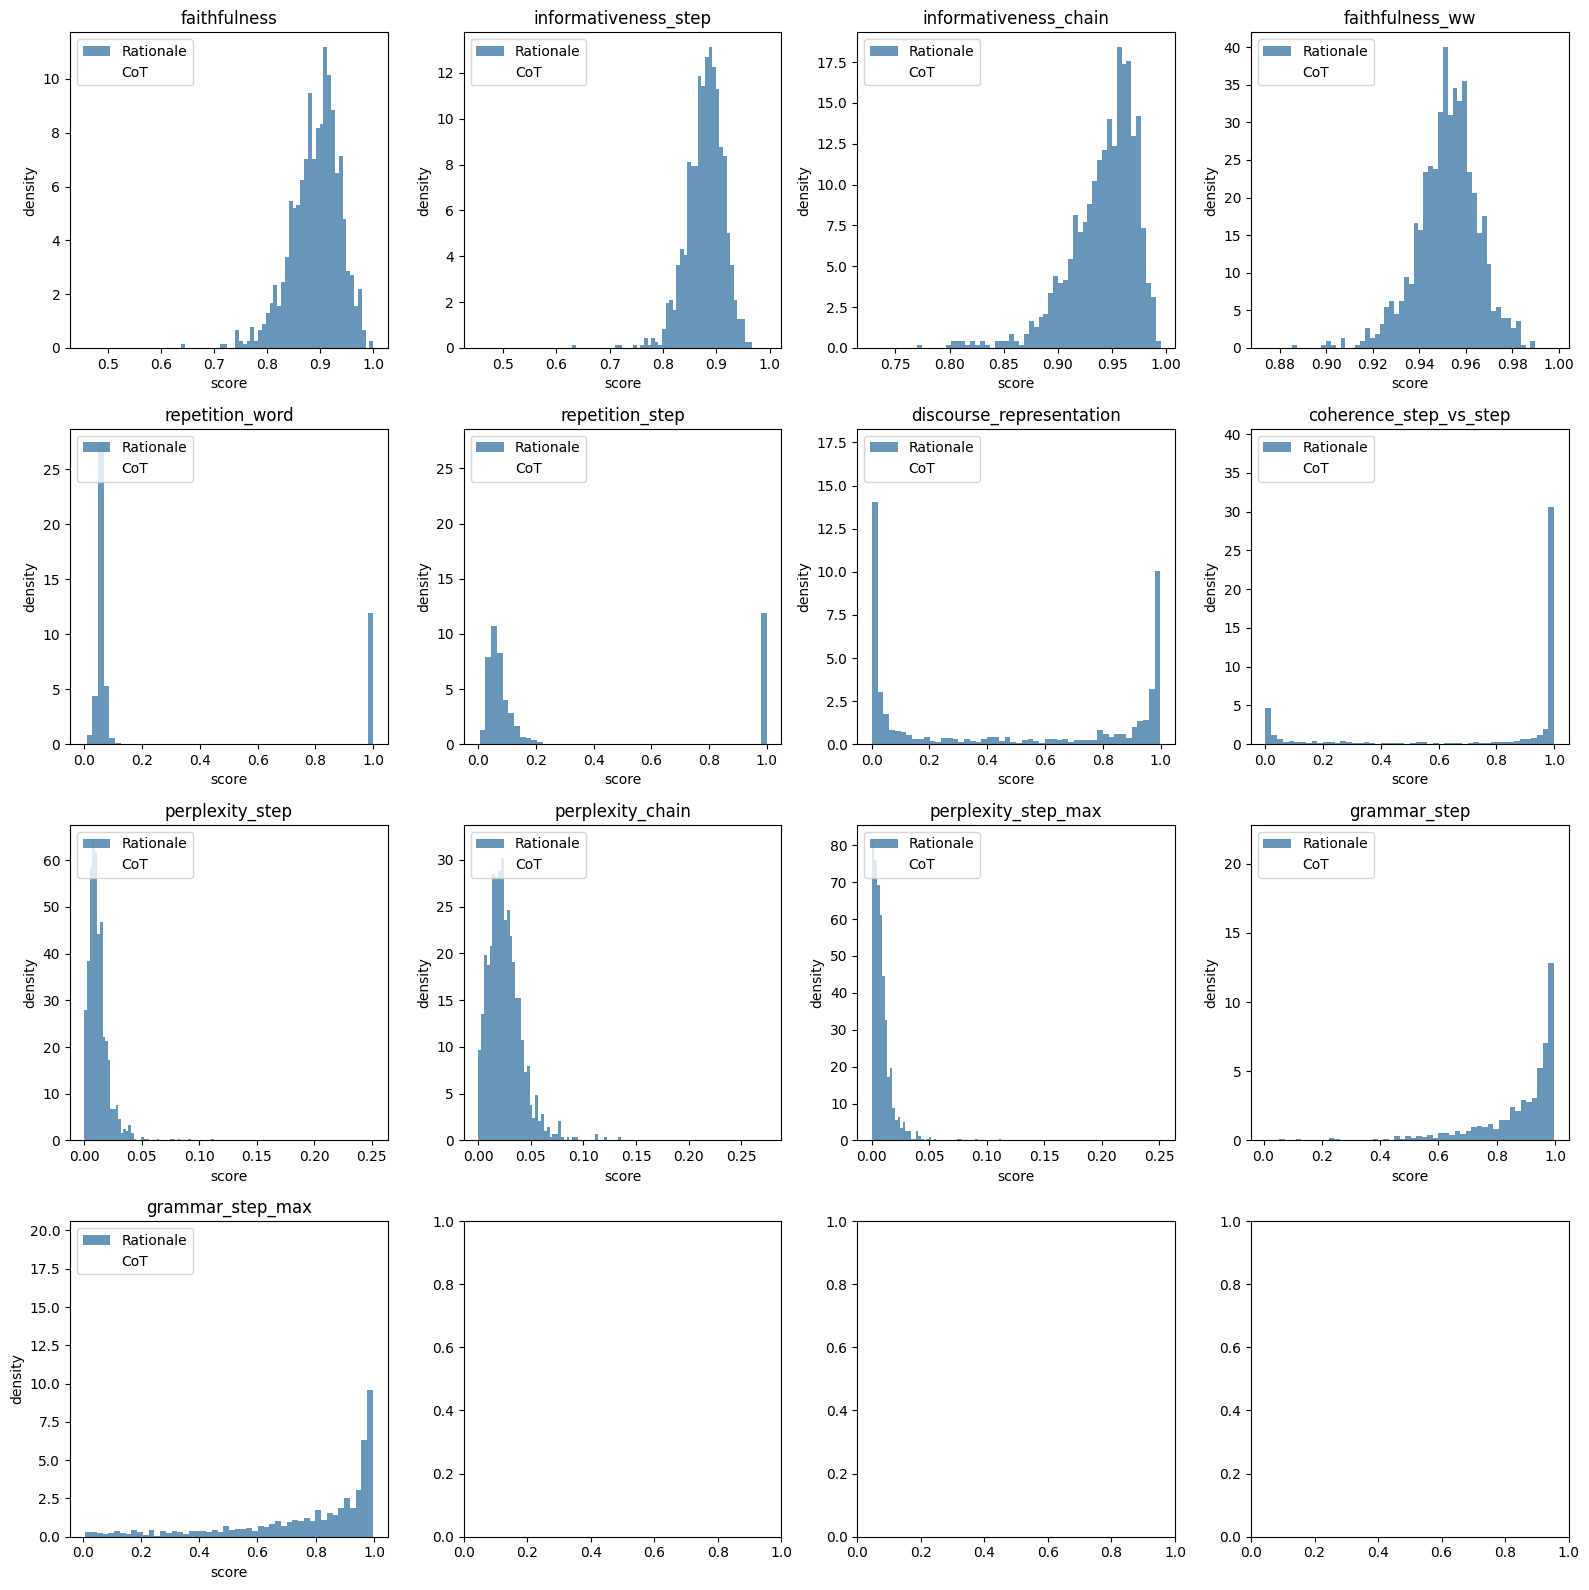

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a diverging color palette with blue for Rationale and red for CoT
colors = sns.diverging_palette(240, 10, n=2)

col_name = ['faithfulness', 'informativeness_step', 'informativeness_chain', 'faithfulness_ww', 'repetition_word', 'repetition_step', 'discourse_representation', 'coherence_step_vs_step', 'perplexity_step', 'perplexity_chain', 'perplexity_step_max', 'grammar_step', 'grammar_step_max']

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i, key in enumerate(col_name):
    row = i // 4
    col = i % 4
    axs[row, col].hist(rationale[key], bins=50, density=True, alpha=0.8, label="Rationale", color=colors[0])
    axs[row, col].hist(cot[key], bins=50, density=True, alpha=0.3, label="CoT" ,color=colors[1])
    axs[row, col].set_title(key)
    axs[row, col].set_xlabel("score")
    axs[row, col].set_ylabel("density")
    axs[row, col].legend(loc='upper left')

plt.tight_layout()
plt.savefig("roscoe-512-roberta-base/output/rat_cot_all.svg",format='svg', dpi='figure', bbox_inches='tight')
plt.show()